In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set up data path
path = Path('./data')
# Load and prepare data
population = pd.read_csv(path / 'pop2.csv')
voting = pd.read_csv(path / 'expc.csv', index_col='שם ישוב')
reserves = pd.read_csv(path / 'reserve_data.csv', index_col='city').reset_index()
reserves['city'] = reserves['city'].str.strip()
reserves['city'] = reserves['city'].apply(lambda x: x.replace(')', '').replace('(', ''))

In [3]:
# defining age groups for reserve-relevant population
reserve_cols = ['age_19-45', 'age_46-55']
population['city_name'] = population['city_name'].str.strip()
population['city_name'] = population['city_name'].apply(lambda x: x.replace(')', '').replace('(', ''))
population['total_reserve_pop'] = population[reserve_cols].sum(axis=1)

In [5]:
df = pd.merge(reserves, population,left_on='city', right_on='city_name', how="inner").rename(columns={'total': 'total_pop'})

df['reserve_days_per_capita'] = df['reserve_days'] / df['total_pop']
df['reserve_days_per_reserve_age_capita'] = df['reserve_days'] / df['total_reserve_pop']
df['log_total_pop'] = df['total_pop'].apply(lambda x: np.log(x))
df['log_total_reserve_pop'] = df['total_reserve_pop'].apply(lambda x: np.log(x))
df['log_reserve_days'] = df['reserve_days'].apply(lambda x: np.log(x))

avg = df['reserve_days_per_reserve_age_capita'].mean()
sd = df['reserve_days_per_reserve_age_capita'].std()
df['reserve_days_per_reserve_age_capita_sd'] = (df['reserve_days_per_reserve_age_capita'] - avg) / sd

df = pd.merge(df, voting, left_on='city', right_index=True, how='left')
total_reserve_days = df['reserve_days'].sum()
total_reserve_pop = df['total_reserve_pop'].sum()
avg_reserve_days_per_capita = total_reserve_days / total_reserve_pop
df.sort_values('reserve_days_per_reserve_age_capita', ascending=False).head(10)

,city,reserve_days,סמל_ישוב,city_name,סמל_נפה,נפה,קוד_לשכת_מנא,לשכת_מנא,קוד_מועצה_אזורית,מועצה_אזורית,...,צ,ץ,ק,קי,קך,קנ,קץ,רז,שס,ת
1044,נמרוד,1296.0,4035,נמרוד,29,גולן,22,טבריה,71,גולן,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,מבואות יריחו,7940.0,3825,מבואות יריחו,75,ירדן )יריחו(,11,ירושלים,75,ערבות הירדן,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,מחנה יתיר,5506.0,1196,מחנה יתיר,62,באר שבע,62,באר שבע,0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,רמת טראמפ,2503.0,4029,רמת טראמפ,29,גולן,22,טבריה,71,גולן,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,גלגל,5431.5,3606,גלגל,75,ירדן )יריחו(,23,עפולה,75,ערבות הירדן,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
591,"נווה אטי""ב",5283.0,4303,"נווה אטי""ב",29,גולן,21,צפת,71,גולן,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,אודם,5223.0,4010,אודם,29,גולן,21,צפת,71,גולן,...,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
540,משכיות,5764.0,3785,משכיות,75,ירדן )יריחו(,11,ירושלים,75,ערבות הירדן,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
276,אלוני הבשן,10623.0,4017,אלוני הבשן,29,גולן,22,טבריה,71,גולן,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
312,משואה,9397.0,3605,משואה,75,ירדן )יריחו(,23,עפולה,75,ערבות הירדן,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


posx and posy should be finite values
posx and posy should be finite values


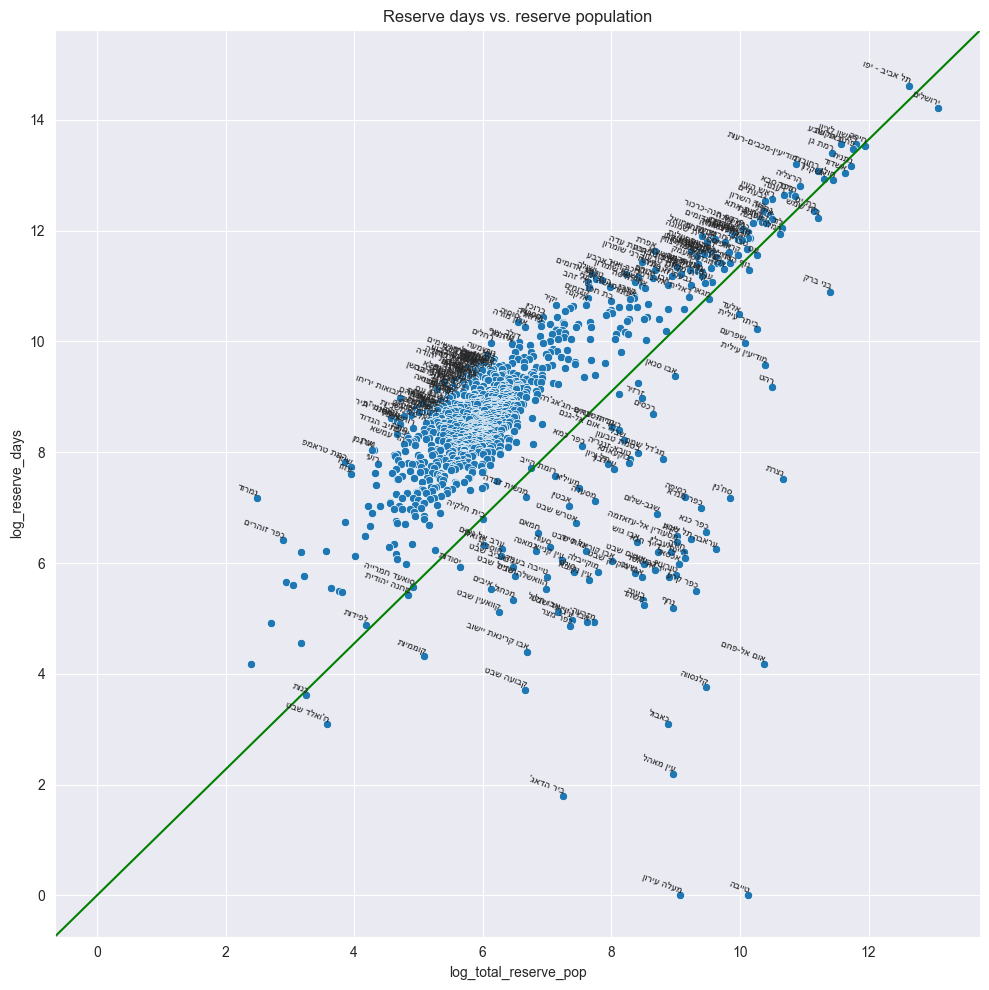

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(df, y = 'log_reserve_days', x = 'log_total_reserve_pop')
# plot axi
plt.axline(xy1=(0,0), xy2=(np.log(df['total_reserve_pop'].max()),
                           np.log(avg_reserve_days_per_capita*df['total_reserve_pop'].max())),
           color='green')

for i, row in df.iterrows():
    # only plot top 100 cities or cities with high\low standard deviation
    if i <= 100 or (row['reserve_days_per_reserve_age_capita_sd'] > 1.4) or (row['reserve_days_per_reserve_age_capita_sd'] < -1.2):
        plt.text(row['log_total_reserve_pop'], row['log_reserve_days'], row['city'][::-1],
                     rotation=-20,               # Rotate the text to face up and left
                rotation_mode='anchor',    # Make rotation anchor-based
                horizontalalignment='right', # Align the text's beginning to the point
                verticalalignment='bottom', # Align the text to the bottom of the point
                 fontsize=7)

title = "Reserve days vs. reserve population"
plt.title(title)
plt.tight_layout()
plt.show()

In [12]:
coalition = {
    r"מחל" : "The Union",
    r"שס" : "Shas",
    r"ג" : "United Torah Judaism",
    r"ט" : "Religious Zionism and Jewish Power",
    }
opposition = {
    r"פה": "There Is Future",
    r"כן": "The Kingdom Camp",
    r"ל": "Israel Is Our Home",
    r"עם": "United Arab List",
    r"ום": "Hadash-Ta'al",
    r'אמת' : 'The Work'
    }

# Calculate total votes for coalition and opposition
df['coal'] = df[coalition.keys()].sum(axis=1)
df['opp'] = df[opposition.keys()].sum(axis=1)
df['coal_pct'] = df['coal'] / (df['coal'] + df['opp'])

Text(0.5, 1.0, 'Reserve days vs. reserve population (log-scale) by coal%')

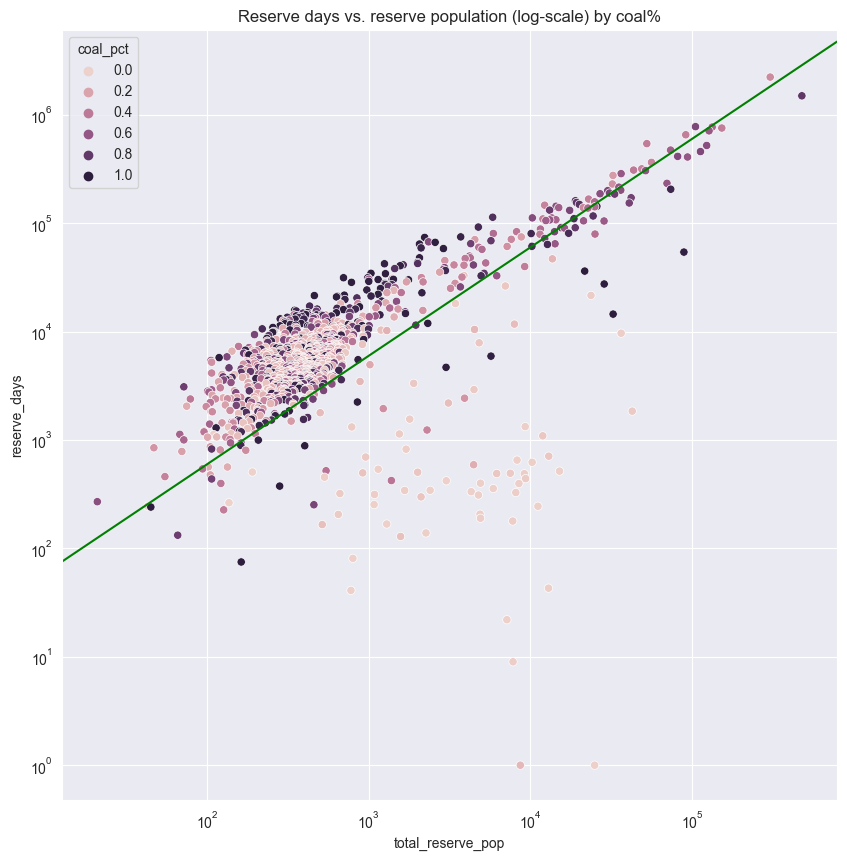

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(df, x = 'total_reserve_pop', y = 'reserve_days', hue='coal_pct')
plt.axline(xy1=(0,0), xy2=(df['total_reserve_pop'].max(),
                           avg_reserve_days_per_capita*df['total_reserve_pop'].max()),
           color='green')


plt.xscale('log')
plt.yscale('log')
plt.title("Reserve days vs. reserve population (log-scale) by coal%")

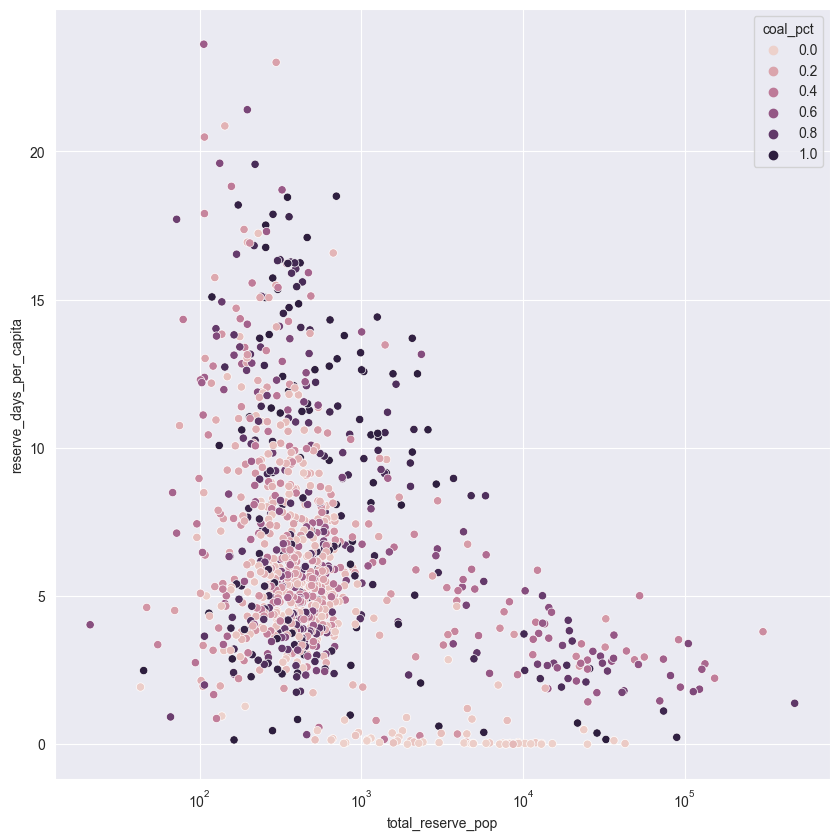

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(df, x = 'total_reserve_pop', y = 'reserve_days_per_capita', hue='coal_pct')

plt.xscale('log')

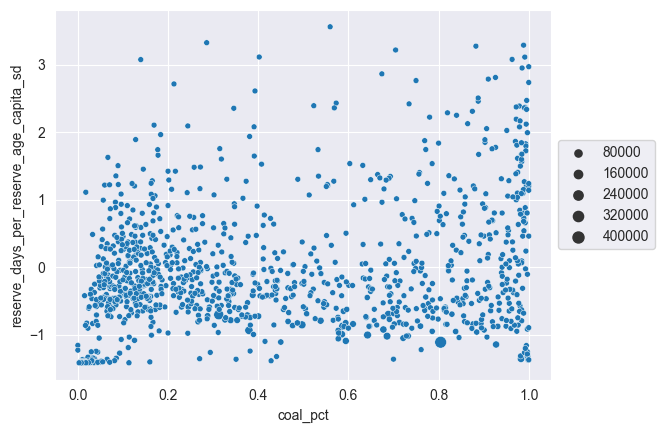

In [16]:
sns.scatterplot(df, y= 'reserve_days_per_reserve_age_capita_sd', x = 'coal_pct',
                size='total_reserve_pop')
# legend outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [25]:
cols = ['city', 'total_reserve_pop', 'reserve_days', 'reserve_days_per_reserve_age_capita', 'reserve_days_per_reserve_age_capita_sd', 'coal_pct']
print(f"Top cities by reserve days per capita (with coalition% known")
df[cols].sort_values('reserve_days_per_reserve_age_capita', ascending=False).dropna().head(20)

Top cities by reserve days per capita (with coalition% known


,city,total_reserve_pop,reserve_days,reserve_days_per_reserve_age_capita,reserve_days_per_reserve_age_capita_sd,coal_pct
578,גלגל,106,5431.5,51.240566,3.559991,0.559524
600,אודם,107,5223.0,48.813084,3.324357,0.285714
540,משכיות,119,5764.0,48.436975,3.287849,0.988506
276,אלוני הבשן,220,10623.0,48.286364,3.273229,0.882812
312,משואה,197,9397.0,47.700508,3.216360,0.704698
411,תומר,157,7321.0,46.630573,3.112503,0.402299
160,רחלים,462,21539.0,46.621212,3.111594,0.991176
223,מצדות יהודה,284,13139.5,46.265845,3.077099,0.963077
471,מיצר,143,6612.0,46.237762,3.074373,0.139535
184,חגי,349,15758.0,45.151862,2.968966,1.000000


In [26]:
print(f"Bottom cities by reserve days per capita (with coalition% known")
df[cols].sort_values('reserve_days_per_reserve_age_capita', ascending=True).dropna().head(20)

Bottom cities by reserve days per capita (with coalition% known


,city,total_reserve_pop,reserve_days,reserve_days_per_reserve_age_capita,reserve_days_per_reserve_age_capita_sd,coal_pct
1162,עוזייר,1926,0.0,0.000000,-1.413883,0.002732
1160,טייבה,25019,1.0,0.000040,-1.413879,0.007250
1161,מעלה עירון,8686,1.0,0.000115,-1.413872,0.113339
1158,עין מאהל,7830,9.0,0.001149,-1.413771,0.017918
1157,כאבול,7170,22.0,0.003068,-1.413585,0.005612
1153,קלנסווה,12976,43.0,0.003314,-1.413561,0.011803
1133,כפר קרע,11162,245.0,0.021949,-1.411752,0.008109
1139,נחף,7795,179.0,0.022963,-1.411654,0.023436
1094,עראבה,15178,517.0,0.034062,-1.410577,0.005287
1138,משהד,4924,190.0,0.038587,-1.410137,0.016975


In [28]:
df[df['reserve_days_per_reserve_age_capita_sd'] > 1.4][cols]

,city,total_reserve_pop,reserve_days,reserve_days_per_reserve_age_capita,reserve_days_per_reserve_age_capita_sd,coal_pct
75,שילה,2223,74088.5,33.328160,1.821250,0.992248
84,עלי,2064,64365.0,31.184593,1.613176,0.975248
103,יקיר,1254,42337.5,33.761962,1.863359,0.970378
117,ברוכין,1035,34561.0,33.392271,1.827473,0.992997
126,סוסיה,700,31467.0,44.952857,2.949649,0.985240
...,...,...,...,...,...,...
960,רועי,79,2393.0,30.291139,1.526449,0.407407
971,שיזף,52,2292.0,44.076923,2.864623,NaN
994,עזוז,52,1997.0,38.403846,2.313942,NaN
1044,נמרוד,12,1296.0,108.000000,9.069575,NaN
